In [7]:
%run header.ipynb

Finite Impulse Response (FIR) filters are such digital filters which have - as the name suggests - a finite impulse response. These filters do not have an internal feedback and can be applied simply by convolving an input sequence $x[n]$ with the filter's impulse response $h[n]$ to get the output sequence $y[n]$:


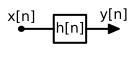

In [8]:
d = schem.Drawing(unit=1, fontsize=14)

d.add(e.DOT, label='$x[n]$');
d.add(e.LINE, d='r')
d.add(dsp.BOX, label='$h[n]$')
d.add(e.LINE, d='r')
d.add(e.ARROWHEAD,label='$y[n]$')


d.draw();

For FIR filters, the impulse response $h[n]$ is a one-dimensional array containing the $N$ filter coefficients. The following example shows the coefficients, respectively the impulse response for a filter of the order $N=5$:

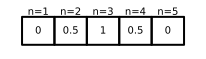

In [3]:
d = schem.Drawing()
d = schem.Drawing(fontsize=10)

z1 = d.add(dsp.BOX, label= '0',   toplabel='n=1')
z2 = d.add(dsp.BOX, label= '0.5', toplabel='n=2')
z3 = d.add(dsp.BOX, label= '1',   toplabel='n=3')
z4 = d.add(dsp.BOX, label= '0.5', toplabel='n=4')
z5 = d.add(dsp.BOX, label= '0',   toplabel='n=5')

d.draw()

-----

## The Difference Equation

From the impulse response we can get the coefficients $b_n$ to write the difference equation, which is the basis for applying a filter:

$$
y[n] = b_0 x[n] + b_1 x[n-1]+ b_2 x[n-2]+ b_3 x[n-3]+ b_4 x[n-4] + b_5 x[n-5]
$$


## Implementation Structure 

Another important representation of a filter is the  implementation structure. It can be directly derived from the difference equation. Each $z^{-1}$ block represents a delay by one sample. This case shows the direct form:

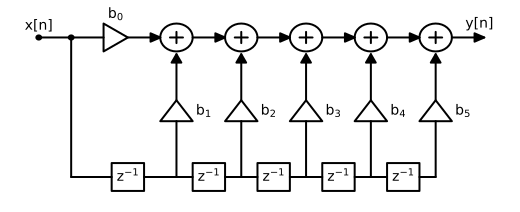

In [4]:
d = schem.Drawing(unit=1, fontsize=14)

d.add(e.DOT, label='$x[n]$');
d.add(e.LINE, d='r')
d.add(e.DOT);

d.push()

d.add(e.LINE, d='r')
d.add(dsp.AMP,toplabel='$b_0$')
d.add(e.LINE, d='r')
d.add(e.ARROWHEAD)
s0 = d.add(dsp.SUM)


d.add(e.LINE, d='r',l=1)
d.add(e.ARROWHEAD)
s1 = d.add(dsp.SUM)

d.add(e.LINE, d='r',l=1)
d.add(e.ARROWHEAD)
s2 = d.add(dsp.SUM)

d.add(e.LINE, d='r',l=1)
d.add(e.ARROWHEAD)
s3 = d.add(dsp.SUM)

d.add(e.LINE, d='r',l=1)
d.add(e.ARROWHEAD)
s4 = d.add(dsp.SUM)

d.add(e.LINE, d='r',l=1)
d.add(e.ARROWHEAD,label='$y[n]$')

## The lower parts ########################################

d.pop()

d.add(e.LINE, d='d',l=5)

d.add(e.LINE, d='r',l=1.25)
z1 = d.add(dsp.BOX, label='$z^{-1}$')
d.add(e.LINE, d='r')

d.push()

d.add(e.LINE, d='u',l=2)
d.add(dsp.AMP,botlabel='$b_1$')
d.add(e.LINE, d='u',l=1.65)
d.add(e.ARROWHEAD)

########################################

d.pop()

d.add(e.LINE, d='r',l=0.5)
z2 = d.add(dsp.BOX, label='$z^{-1}$')
d.add(e.LINE, d='r',l=0.5)

d.push()

d.add(e.LINE, d='u',l=2)
d.add(dsp.AMP,botlabel='$b_2$')
d.add(e.LINE, d='u',l=1.65)
d.add(e.ARROWHEAD)

########################################

d.pop()

d.add(e.LINE, d='r',l=0.5)
z3 = d.add(dsp.BOX, label='$z^{-1}$')
d.add(e.LINE, d='r',l=0.5)

d.push()

d.add(e.LINE, d='u',l=2)
d.add(dsp.AMP,botlabel='$b_3$')
d.add(e.LINE, d='u',l=1.65)
d.add(e.ARROWHEAD)

########################################

d.pop()

d.add(e.LINE, d='r',l=0.5)
z3 = d.add(dsp.BOX, label='$z^{-1}$')
d.add(e.LINE, d='r',l=0.5)

d.push()

d.add(e.LINE, d='u',l=2)
d.add(dsp.AMP,botlabel='$b_4$')
d.add(e.LINE, d='u',l=1.65)
d.add(e.ARROWHEAD)

########################################

d.pop()

d.add(e.LINE, d='r',l=0.5)
z3 = d.add(dsp.BOX, label='$z^{-1}$')
d.add(e.LINE, d='r',l=0.5)

d.push()

d.add(e.LINE, d='u',l=2)
d.add(dsp.AMP,botlabel='$b_5$')
d.add(e.LINE, d='u',l=1.65)
d.add(e.ARROWHEAD)

d.draw();

-----

## Applying a Filter by Convolution

Applying the filter with the given impulse response is done by simple convolution, which is the same as passing samples from the input of the implemtation structure above to its output.
The above equation is then written as follows:


$$
\begin{eqnarray}
y[m] &=& x[n] * h[m]\\
     &=& \sum\limits_{m=0}^{M} h[m] x(n-m)\\
     &=& \sum\limits_{m=0}^{M} b_m x(n-m)\\
\end{eqnarray}
$$

-----

## The Transfer Function


The difference equation can also be expressed as a sum:

$$
h[n] = \sum\limits_{n=0}^{N} b_n x[n-1]
$$


The transfer function of the filter can be obtained via the z-transform:

$$
H[z] = \sum\limits_{n=0}^{N} h[n] z^{-n} 
$$


$$
H(z) = 0.5 z^{-2} +  z^{-3} + 0.5 z^{-4}  
$$


In the next step, all exponents are shifted by expanding with $z^{4}$:

$$
H(z) = \frac{z^2 + 2z + 1}{z^4}
$$



Factor the denominator to find its roots:


$$
H(z) = \frac{(z+1)(z+1)}{z^4}
$$

**There is a double zero at $\mathbf{z=-1}$**.
As all causal FIR filters it has $N=4$ poles at the origin $z=0$.

With $z=e^{j\omega}$ the complex roots can be obtained:

$$
Z = (e^{-i\omega} +1)(e^{-i\omega} +1)
$$

----

# In the Unit Cirlce

An LTI system can be visualized in the z-plane by plotting the zeros, respectively the roots of its impulse response. 


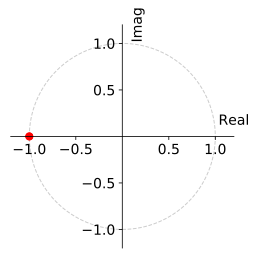

In [5]:
h = np.array([0,0.5,1,0.5,0])

b = [1,2,1]
a = [4,0,0,0,0]

ax = plt.subplot(111)
ax.axis('equal')

ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

r = 1.2; 
plt.axis('scaled'); 
plt.axis([-r, r, -r, r]);
ticks = [-1, -.5, .5, 1]; 
plt.xticks(ticks); 
plt.yticks(ticks);
    
uc = patches.Circle((0,0), radius=1, fill=False,
                        color= [0.8,0.8,0.8], ls='dashed');
ax.add_patch(uc);

# zeros
z  = np.roots(b);

#print('Zeros = '+str(z))

t1 = plt.plot(z.real, z.imag, 'ro', ms=7);


plt.xlabel('Real');
plt.ylabel('Imag');
ax.xaxis.set_label_coords(1,   0.6);
ax.yaxis.set_label_coords(0.6, 1);

## Frequency Response

The frequency response of the filter 


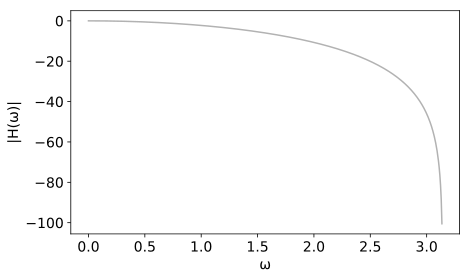

In [6]:
w, H = signal.freqz(b,a)
       
plt.plot(w, 20 * np.log10(abs(H)), color=[0.7,0.7,0.7]);
plt.xlabel('$\omega$');
plt.ylabel('$|H(\omega)|$');

#imp = signal.unit_impulse(100, 'mid')
#response = signal.lfilter(b, a, imp)

#plt.figure();
#plt.plot(response, color=[0.7,0.7,0.7]);